#### About the dataset :

#### This dataset (household_energy_usage_regression.csv) contains energy consumption and weather-related info for a household over several months. Variables include -
* datetime: month, day, year and hour for each kwh reading
* kwh: energy consumption in kilowatts-hours
* temperatureF: Fahrenheit
* temperatureC: Celsius 
* humidity: percent relative humidity
* dewpointC: dew point in Celsiu

#### Problem Statement :
* The goal is to predict household energy consumption, kwh dependent variable, using Ordinary Least Squares (OLS) linear regression.

#### Challenges :
* Linear regression can be sensitive to outliers, which can disproportionately influence the model
* Linear regression is a parametric method that assumes a linear relationship between the independent variables and the dependent variable.
* It fails to capture complex relationships between variables.

In [63]:
# Import necessary libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

## A. Data Collection ----------------------------------------------

In [32]:
# Load the data 
df = pd.read_csv('household_energy_usage_regression.csv')

In [33]:
df.head()

,datetime,kwh,temperatureF,temperatureC,humidity,dewpointC
0,2019-09-26 0:00:00,1.6247,75.89,24.383333,0.78,4.539333
1,2019-09-26 1:00:00,2.6749,75.08,23.933333,0.81,4.095333
2,2019-09-26 2:00:00,1.6013,74.43,23.572222,0.83,3.738222
3,2019-09-26 3:00:00,1.6093,73.84,23.244444,0.84,3.412444
4,2019-09-26 4:00:00,1.5653,73.35,22.972222,0.85,3.142222


## B. Data Preprocessing --------------------------------------------

### 1. Data Cleaning 

In [34]:
print(f"Total columns {len(df.columns)}")

print(f"Columns are : {df.columns}")

Total columns 6
Columns are : Index(['datetime', 'kwh', 'temperatureF', 'temperatureC', 'humidity',
       'dewpointC'],
      dtype='object')


In [35]:
print(f"Duplicate values in the dataset are : \n{df.duplicated().value_counts()}")

Duplicate values in the dataset are : 
False    10055
dtype: int64


* Dataset has 0 Duplicate values

In [36]:
# checking the datatype of each column and the count of non_null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10055 entries, 0 to 10054
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      10055 non-null  object 
 1   kwh           10055 non-null  float64
 2   temperatureF  9969 non-null   float64
 3   temperatureC  9969 non-null   float64
 4   humidity      9969 non-null   float64
 5   dewpointC     9969 non-null   float64
dtypes: float64(5), object(1)
memory usage: 471.5+ KB


<AxesSubplot:>

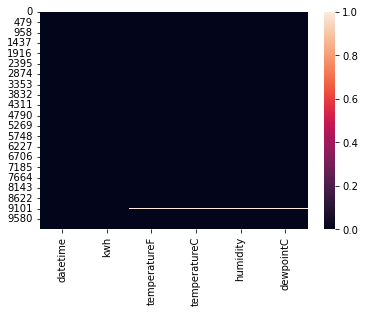

In [37]:
# checking for null values using heatmap
sns.heatmap(df.isnull())

* From the heatmap we can say that the dataset has some null values now let's findout how many null values are present in the dataset 

In [38]:
# checking the number of null values
df.isna().sum()

datetime         0
kwh              0
temperatureF    86
temperatureC    86
humidity        86
dewpointC       86
dtype: int64

* We have some null values but the dataset has 10k rows , so if we remove those NaN values this will not harm our model performance. So we will remove those NaN values using dropna()

In [39]:
# removing the nan values
df.dropna(inplace=True)

### 2. Exploratory Data Analysis (EDA)

               kwh  temperatureF  temperatureC     humidity    dewpointC
count  9969.000000   9969.000000   9969.000000  9969.000000  9969.000000
mean      1.971046     77.794110     25.441172     0.777043     5.596581
std       1.121946      7.830298      4.350165     0.138310     4.340707
min       0.286300     38.930000      3.850000     0.220000   -16.014000
25%       1.121700     74.020000     23.344444     0.680000     3.502889
50%       1.822200     78.230000     25.683333     0.800000     5.850889
75%       2.716500     82.890000     28.272222     0.890000     8.418000
max       7.637700     95.940000     35.522222     1.000000    15.612222


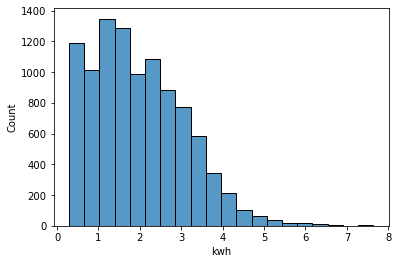

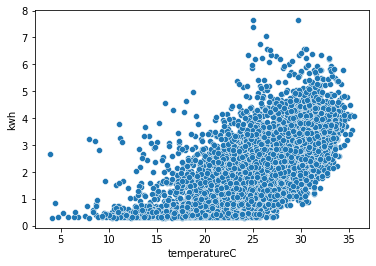

In [40]:
# Basic statistics
print(df.describe())

# Visualize distributions
sns.histplot(df['kwh'], bins=20)
plt.show()

# Explore relationships with scatter plots
sns.scatterplot(x='temperatureC', y='kwh', data=df)
plt.show()

* From the histplot we can say te distribution is right skewed ,It indicates that there are observations at one of the extreme ends of the distribution, but that they’re relatively infrequent


* From the scatter plot we can say that kwh is more for higher temperature.  

### 3.  Data Transformation 

In [44]:
#  Feature Scaling : Using StandardScaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def scale_sts(df):
    scaler = StandardScaler()
    df = scaler.fit_transform(df.values.reshape(-1,1))
    return df
for i in df.columns[2:]:
    if len(df[i].unique()) > 1:
        df[i] = scale_sts(df[i])
    else :
        continue
df.head()

,datetime,kwh,temperatureF,temperatureC,humidity,dewpointC
0,2019-09-26 0:00:00,1.6247,-0.243184,-0.243184,0.021382,-0.243578
1,2019-09-26 1:00:00,2.6749,-0.346634,-0.346634,0.238297,-0.345871
2,2019-09-26 2:00:00,1.6013,-0.429649,-0.429649,0.382907,-0.428145
3,2019-09-26 3:00:00,1.6093,-0.505001,-0.505001,0.455212,-0.503200
4,2019-09-26 4:00:00,1.5653,-0.567582,-0.567582,0.527517,-0.565457


### 4. Feature Selection

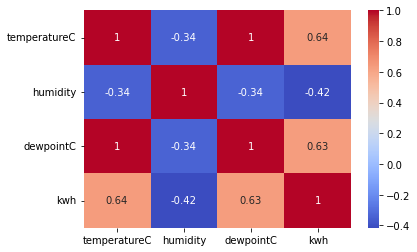

In [45]:
# Identify potential features
# here  temperature in Celsius and Fahrenheit are same thats why we are taking only one
features = ['temperatureC', 'humidity', 'dewpointC']

# Assess correlation
correlation_matrix = df[features + ['kwh']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

* Correlation analysis provides insights into the strength and direction of the linear relationship between two variables. 
* Here temperatureC and dewpointC are positively correlated with Kwh and humidity is negatively correlated with kwh

### 5. Train_Test_Split 

Now we will create x_train, y_train, x_text, y_test for model selection and evaluation . 

we will be using train_test_split with the help of sklearn libraries

In [58]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(df[features], df['kwh'], test_size=0.2, random_state=42)
# let's print the shapes
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((7975, 3), (7975,), (1994, 3), (1994,))

## C.  Model Selection ----------------------------------------------

In [59]:
# Build the model
# This is a regression problrm so we will use Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

* Here we have taken 'temperatureC', 'humidity', 'dewpointC' as independent variables to train our model. 


* 'temperatureC' and 'dewpointC' has same linear_relationship with Kwh. To make our model more simpler we can remove any one.

## D. Model Evaluation ----------------------------------------------

In [60]:
# Evaluate performance
y_pred = model.predict(x_test)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

# Interpret coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)

Mean Absolute Error: 0.6391151993247629
R-squared: 0.4264862094023528
        Feature   Coefficient
0  temperatureC -2.773727e+06
1      humidity -1.763793e+04
2     dewpointC  2.767697e+06
